# Chapter2. Practice List

2. Machine Learning models - unsupervised  

  2-1. clustering
   - hierarchical clustering
   - k-means
   - dbscan  
   - evaluate clustering result

  2-2. dimension reduction
   - pca
   - tsne


3. Evaluation
 - (revisit) machine learning (1) result
 - confusion matrix
 - roc curve
 - regression errors


#### + Pycaret Library - clustering, dimension reduction

In [2]:
# import module
import pandas as pd
import matplotlib.pyplot as plt

# 2. Machine Learning models - unsupervised  

## 2-1. Clustering

In [3]:
from sklearn.datasets import load_iris

iris = load_iris()
iris_data = iris.data
iris_label = iris.target
df = pd.DataFrame(data = iris_data, columns = iris.feature_names)
# df['label'] = iris.target

In [4]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

## Hierarchical Clustering
- dendrogram, linkage, fcluster (in scipy.cluster.hierarchy)
  - linkage : 두 클러스터 사이의 거리를 측정해서 거리가 가까운 클러스터끼리 묶음 -> 두 클러스터의 거리를 측정할때 어디를 기준점으로 할것인가
   - complete: 가장 먼 거리 기준
   - single: 가장 가까운 거리 기준
   - average: 평균 거리 기준
   - ward: 군집 내 편차 제곱합 최소지점 기준
   - centroid: 두 군집의 중심점을 정의한 다음, 두 줌심점의 거리
- agglomerativeClustering
  - n_cluster 선정이 필요함

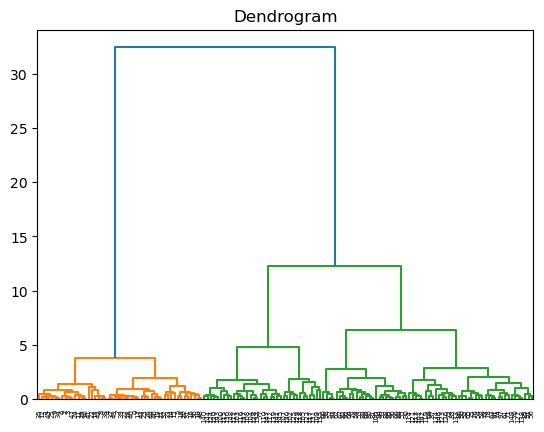

In [5]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
l_clu = linkage(df, method='ward')
plt.figure()
dendrogram(l_clu)
plt.title('Dendrogram')
plt.show()

In [6]:
dist_criteria = 7
agg_clusters = fcluster(l_clu, dist_criteria, criterion='distance')
agg_clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2,
       2, 2, 2, 3, 3, 2, 2, 2, 2, 3, 2, 3, 2, 3, 2, 2, 3, 3, 2, 2, 2, 2,
       2, 3, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 3], dtype=int32)

In [8]:
# 군집화 결과 시각화
import seaborn as sns
def plot_clustering_result(df, clu_model_labels):
  plt.figure(figsize=(20, 6))
  plt.subplot(1,3,1)
  sns.scatterplot(x=df.iloc[:,0], y=df.iloc[:,1], data = df, hue = clu_model_labels)
  plt.subplot(1,3,2)
  sns.scatterplot(x=df.iloc[:,1], y=df.iloc[:,2], data = df, hue = clu_model_labels)
  plt.subplot(1,3,3)
  sns.scatterplot(x=df.iloc[:,0], y=df.iloc[:,3], data = df, hue = clu_model_labels)

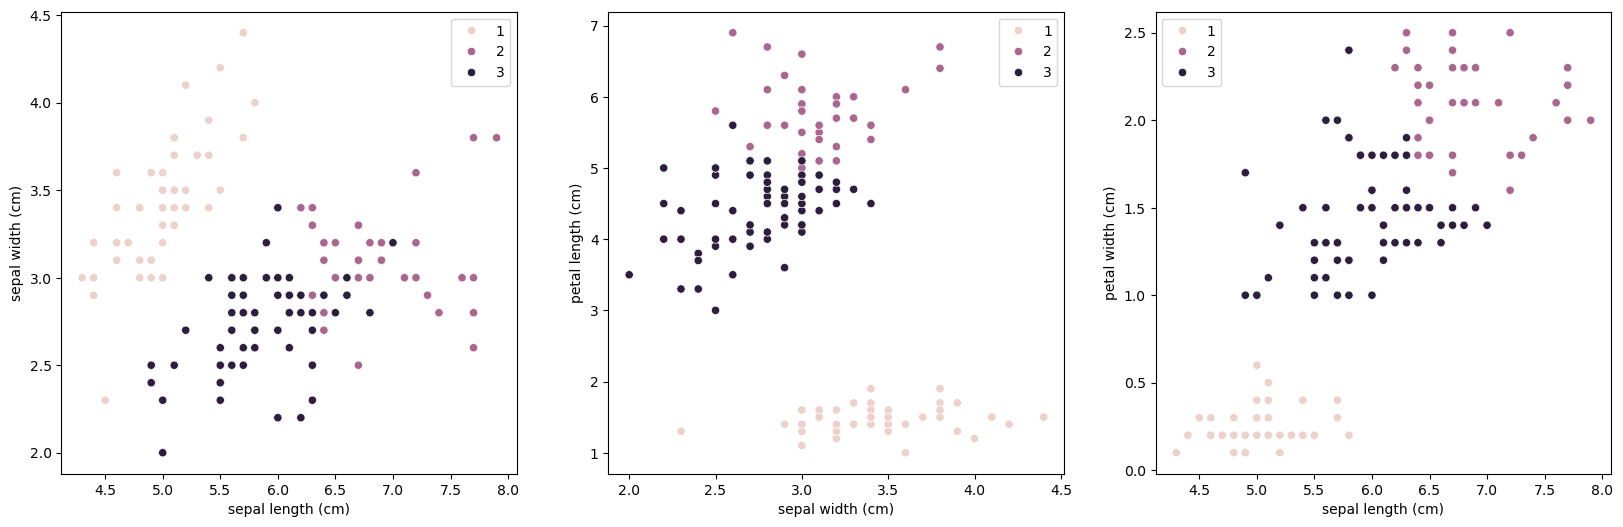

In [9]:
plot_clustering_result(df, agg_clusters)

In [10]:
dist_criteria = 5
agg_clusters = fcluster(l_clu, dist_criteria, criterion='distance')
agg_clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 4, 4, 4, 3, 4, 3, 4, 3, 4, 3, 3, 4, 3, 4, 3, 4,
       3, 3, 4, 3, 4, 4, 4, 4, 4, 4, 4, 2, 4, 3, 3, 3, 3, 4, 3, 4, 4, 4,
       3, 3, 3, 4, 3, 3, 3, 3, 3, 4, 3, 3, 2, 4, 2, 2, 2, 2, 3, 2, 2, 2,
       2, 2, 2, 4, 4, 2, 2, 2, 2, 4, 2, 4, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2,
       2, 4, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 4], dtype=int32)

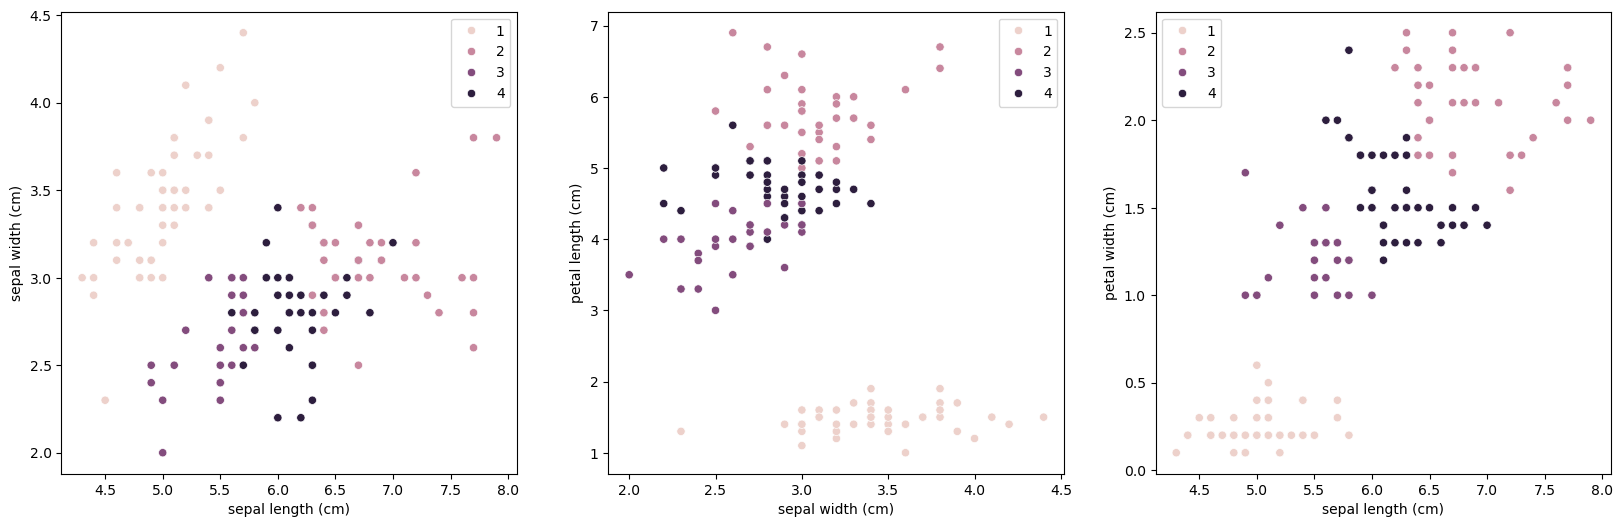

In [11]:
plot_clustering_result(df, agg_clusters)

In [12]:
from sklearn.cluster import AgglomerativeClustering
# sckikit learn으로 할때는 cluster 수를 넣어줘야함
model = AgglomerativeClustering(n_clusters=3,metric='euclidean', linkage='ward')

df_clu_pred = model.fit_predict(df)
df_clu_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

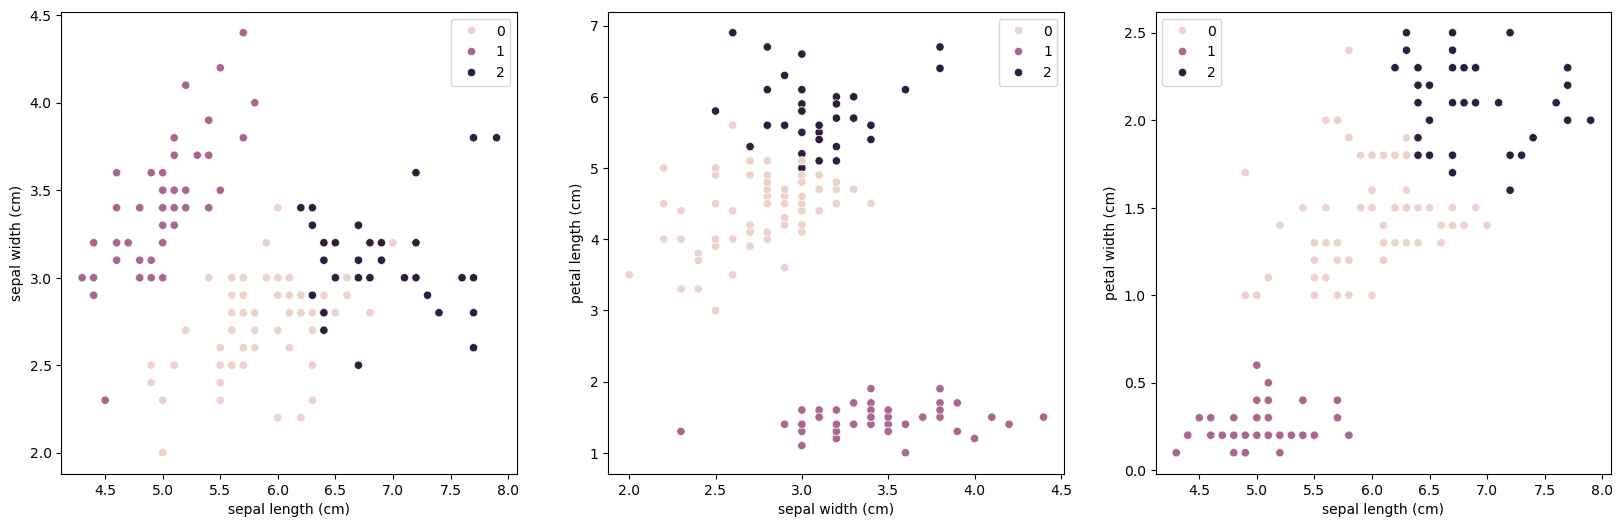

In [13]:
plot_clustering_result(df, df_clu_pred)

## K-means clustering

In [14]:
from os import kill
from sklearn.cluster import KMeans

# find appropriate k - elbow method
k_set = range(1,10)
k_WSS =[] # 군집 내 거리제곱합 iniertia 로 대변됨 (작을수록 좋음)

for k in k_set:
  model = KMeans(n_clusters=k, n_init=10, random_state=7)
  # n_init: initial center point trial number (시도 횟수 중 가장좋은값 선택)
  # random_state: seed 고정
  model.fit(df)
  k_WSS.append(model.inertia_)

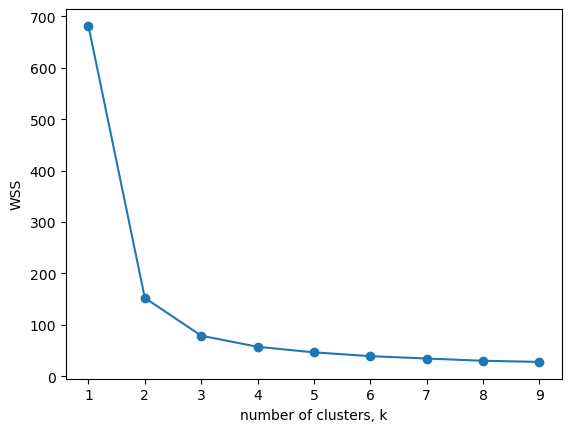

In [15]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(k_set, k_WSS, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('WSS')
plt.xticks(k_set)
plt.show()

In [16]:
# set k and
opti_k = 3
clu_model = KMeans(n_clusters=opti_k,n_init=10, random_state=7)
clu_model.fit(df)

# 학습한 kmeans 군집화 모델의 군집중심, 군집화 예측결과
centers = clu_model.cluster_centers_
pred = clu_model.predict(df)

In [17]:
# 군집화 결과 시각화 with center
import seaborn as sns
def plot_clustering_result_w_center(df, clu_model_labels, centers):
  plt.figure(figsize=(20, 6))
  plt.subplot(1,3,1)
  sns.scatterplot(x=df.iloc[:,0], y=df.iloc[:,1], data = df, hue = clu_model_labels)
  plt.scatter(centers[:,0], centers[:,1], c='black', alpha=0.8, s=150)

  plt.subplot(1,3,2)
  sns.scatterplot(x=df.iloc[:,1], y=df.iloc[:,2], data = df, hue = clu_model.labels_)
  plt.scatter(centers[:,1], centers[:,2], c='black', alpha=0.8, s=150)

  plt.subplot(1,3,3)
  sns.scatterplot(x=df.iloc[:,0], y=df.iloc[:,3], data = df, hue = clu_model.labels_)
  plt.scatter(centers[:,0], centers[:,3], c='black', alpha=0.8, s=150)


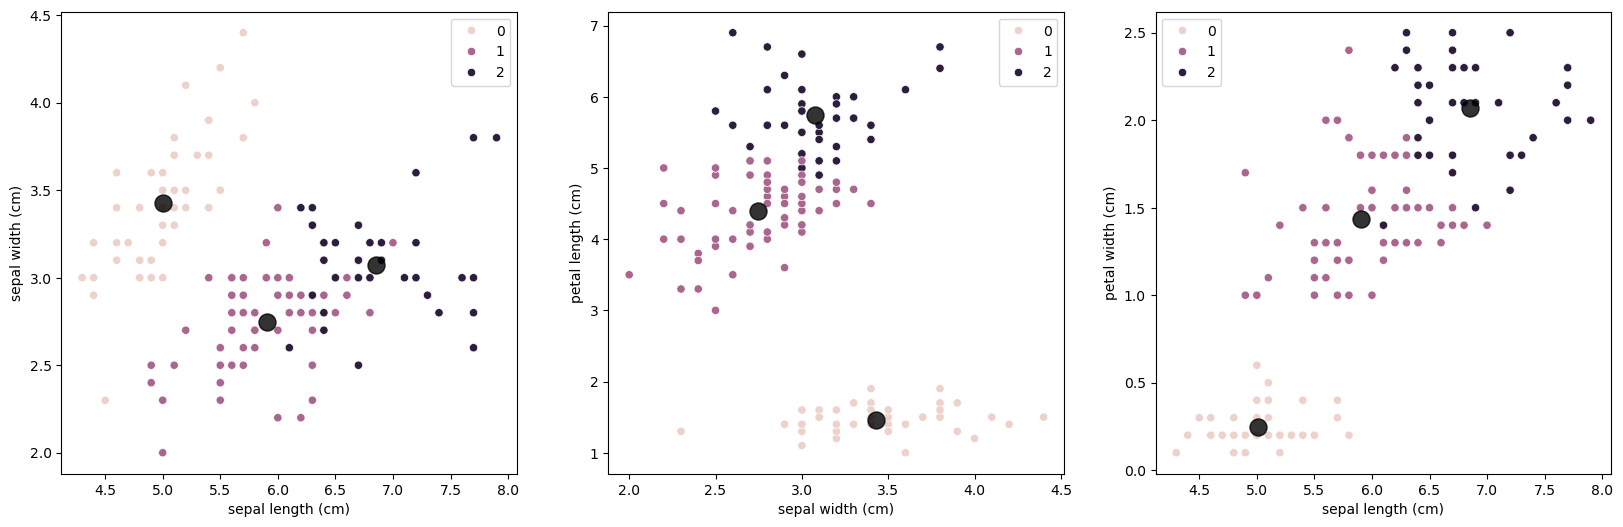

In [18]:
plot_clustering_result_w_center(df, clu_model.labels_,centers)

# DBSCAN
- eps, default=0.5  
The maximum distance between two samples
- min_samples, default = 5  
The number of samples in a neighborhood for a point to be considered as a core point.


In [19]:
from sklearn.cluster import DBSCAN

In [20]:
dbscan = DBSCAN(eps=0.5,min_samples=5)
y_pred = dbscan.fit_predict(df)

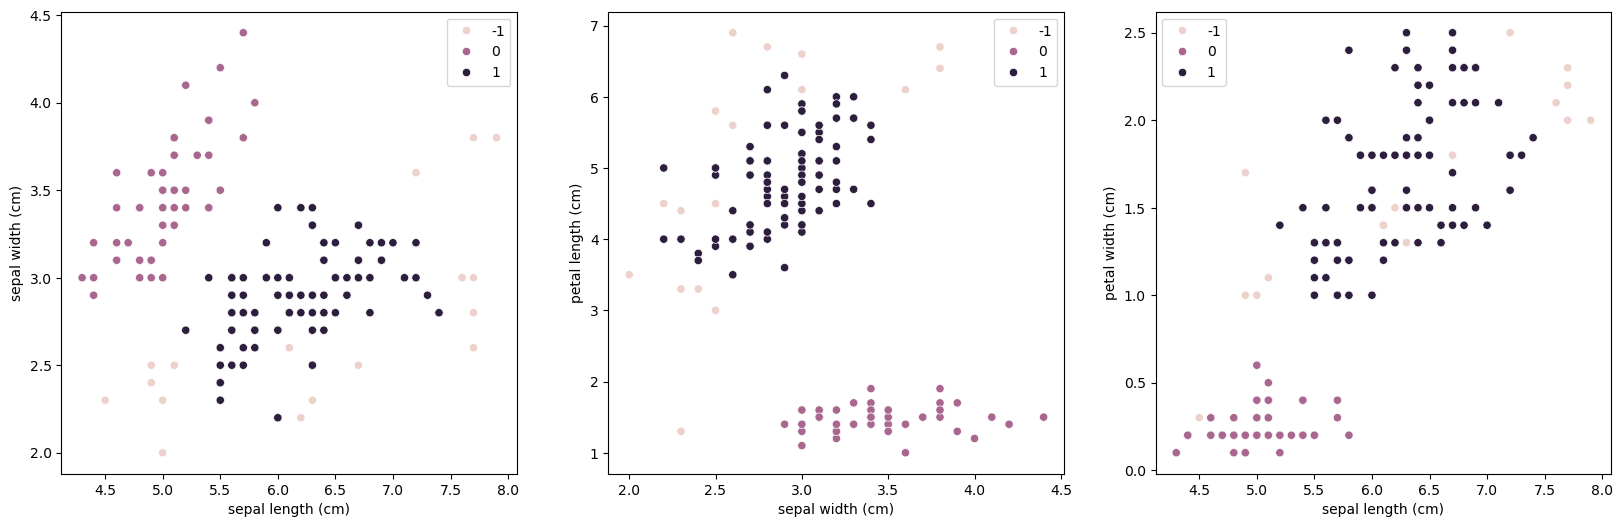

In [21]:
plot_clustering_result(df,dbscan.labels_)

# Evaluate clustering result
- silhoutte score - 클수록 좋음
- dunn index (패키지 없음)

In [23]:
from sklearn.metrics import silhouette_score

In [24]:
real_ss = silhouette_score(X=df, labels=iris_label)
real_ss

0.503477440693296

In [25]:
# hierarchical
hierarchical_ss = silhouette_score(X=df, labels=agg_clusters)

# kmeans
kmeans_ss = silhouette_score(X=df, labels=clu_model.labels_)

# dbscan
dbscan_ss = silhouette_score(X=df, labels=dbscan.labels_)

print(kmeans_ss, hierarchical_ss, dbscan_ss) # 클수록 좋음

0.5528190123564095 0.4889670857554692 0.48603419703456857


# K-means vs DBSCAN 성능 비교
## 2차원 비선형 클러스터 데이터셋 생성

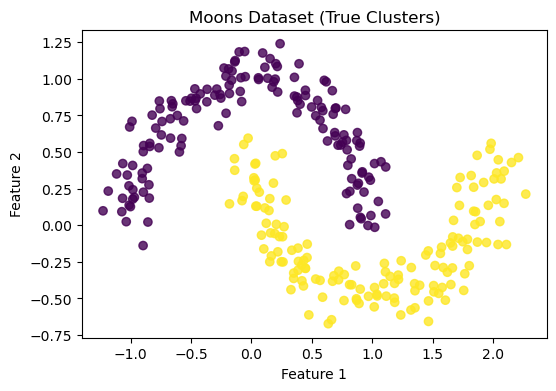

In [42]:
# Moons 형태 데이터셋 생성
import numpy as np
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

# Moon 형태 데이터셋
X_moons, y_moons = make_moons(n_samples=300, noise=0.1, random_state=42)

# 원본 데이터 시각화
plt.figure(figsize=(6, 4))
plt.scatter(X_moons[:, 0], X_moons[:, 1], c=y_moons, cmap='viridis', alpha=0.8)
plt.title('Moons Dataset (True Clusters)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

## K-means 클러스터링 적용

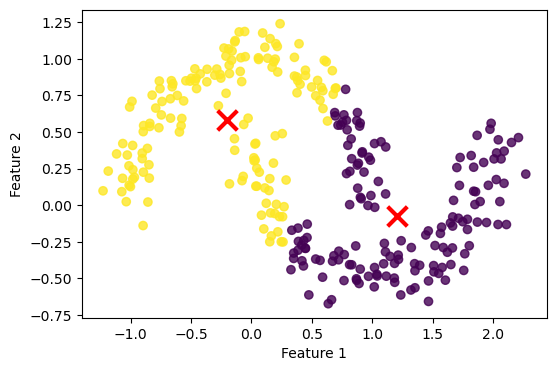

In [49]:
# K-means 클러스터링 적용
from sklearn.cluster import KMeans

# K-means 적용
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
y_pred_kmeans = kmeans.fit_predict(X_moons)

# 시각화
plt.figure(figsize=(6, 4))
plt.scatter(X_moons[:, 0], X_moons[:, 1], c=y_pred_kmeans, cmap='viridis', alpha=0.8)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
           c='red', marker='x', s=200, linewidths=3)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

## DBSCAN 클러스터링 적용

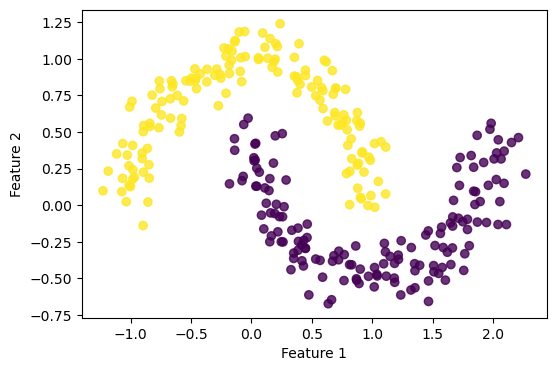

In [55]:
# DBSCAN 클러스터링 적용
from sklearn.cluster import DBSCAN

# DBSCAN 적용
dbscan = DBSCAN(eps=0.2, min_samples=5)
y_pred_dbscan = dbscan.fit_predict(X_moons)

plt.figure(figsize=(6, 4))
plt.scatter(X_moons[:, 0], X_moons[:, 1], c=y_pred_dbscan, cmap='viridis', alpha=0.8)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

## 결과 분석 및 결론

### Moons 데이터셋에서 K-means vs DBSCAN:

**DBSCAN의 우수성:**
- ARI(Adjusted Rand Index): DBSCAN이 훨씬 높은 성능
- 비선형 경계를 가진 초승달 형태를 정확히 분리
- 데이터의 실제 구조를 잘 반영

**K-means의 한계:**
- 원형 클러스터를 가정하므로 비선형 경계 처리 어려움
- 초승달 모양의 복잡한 구조를 제대로 분리하지 못함

**결론:**
- 비선형 클러스터 구조에서는 DBSCAN이 K-means보다 우수한 성능을 보임
- 데이터의 형태에 따라 적절한 클러스터링 알고리즘 선택이 중요

# 2-2. Dimension Reduction

In [62]:
# Iris dataset
df = df.copy()

# PCA

In [63]:
from sklearn.decomposition import PCA

In [64]:
# data scaling 필수
from sklearn.preprocessing import MinMaxScaler
x_scaled = MinMaxScaler().fit_transform(df)


In [65]:
pca = PCA()
pca_feature = pca.fit_transform(x_scaled)

In [66]:
pca_feature.shape
pca.explained_variance_ratio_

array([0.84136038, 0.11751808, 0.03473561, 0.00638592])

In [67]:
pca = PCA(n_components=2)
pca_feature = pca.fit_transform(x_scaled)


Text(0, 0.5, 'pca-2nd component')

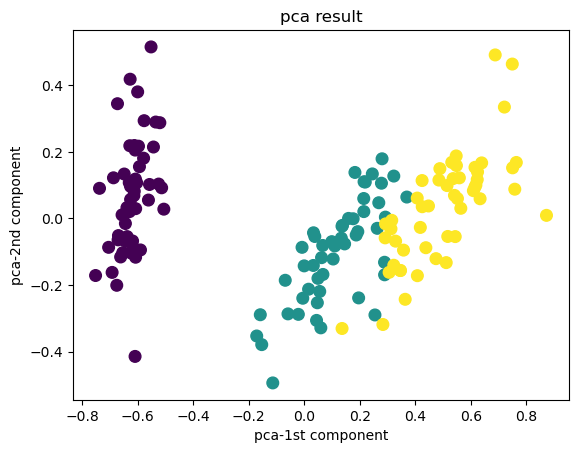

In [68]:
plt.scatter(pca_feature[:,0], pca_feature[:,1],    c=iris_label,    s=70)
plt.title('pca result')
plt.xlabel('pca-1st component')
plt.ylabel('pca-2nd component')

In [69]:
# explained variance
explained_var_ratio = pca.explained_variance_ratio_
explained_var_ratio

array([0.84136038, 0.11751808])

# t-SNE


In [70]:
from sklearn.manifold import TSNE


In [91]:
tsne = TSNE(n_components=2, max_iter=500, perplexity=30)
tsne_feature = tsne.fit_transform(x_scaled)

Text(0, 0.5, '2nd component')

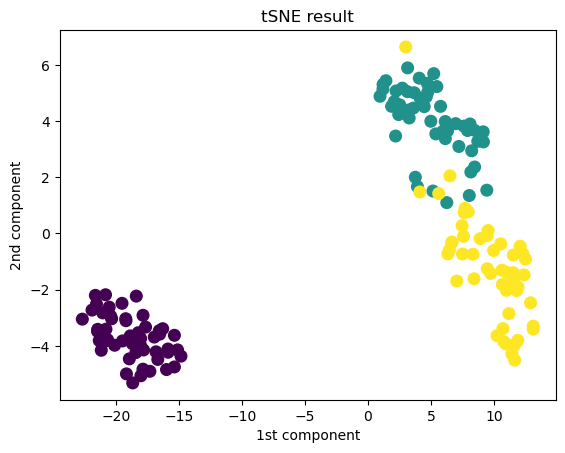

In [92]:
plt.scatter(tsne_feature[:,0], tsne_feature[:,1],    c=iris_label,    s=70)
plt.title('tSNE result')
plt.xlabel('1st component')
plt.ylabel('2nd component')

# 3. Evaluation
- (revisit) ML models in machine learning (1)
- classification
  - confusion matrix
  - roc-curve
- regression

In [93]:
# revisit ML models in machine learning (1)
from sklearn.model_selection import train_test_split # datasplit
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label, test_size=test_size, stratify= iris_label)

In [94]:
pd.DataFrame(y_train).value_counts()

0
0    40
1    40
2    40
Name: count, dtype: int64

In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score # performance measure
lr_clf = LogisticRegression(random_state=0) # model 선언
lr_clf.fit(X_train, y_train) # training
y_pred = lr_clf.predict(X_test) # 모델 예측
test_acc = accuracy_score(y_test, y_pred) # evaluate test_data

## confusion matrix

In [96]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [97]:
cm

array([[10,  0,  0],
       [ 0,  9,  1],
       [ 0,  1,  9]])

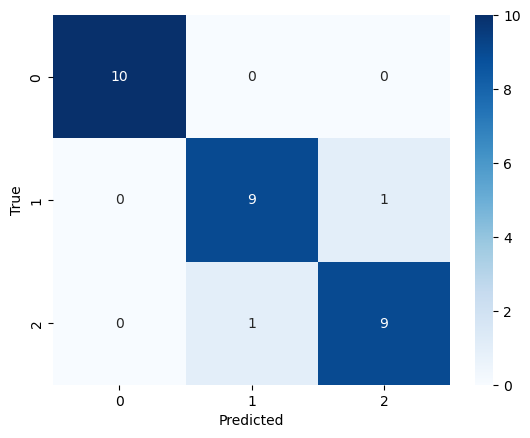

In [98]:
# visualization
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [99]:
from sklearn.metrics import precision_score, recall_score, f1_score
# for multiclass - average: macro
# 각각 class에 따라 confusion matrix 그려서 score를 계산한 후, 값들의 평균을 사용

p=precision_score(y_test, y_pred, average = "macro")
print('precision : {0: .4f}'.format(p))
r = recall_score(y_test, y_pred, average = "macro")
print('recall : {0: .4f}'.format(r))
f1 = f1_score(y_test, y_pred, average = "macro")
print('f1-score : {0: .4f}'.format(f1))

precision :  0.9333
recall :  0.9333
f1-score :  0.9333


## ROC curve

In [100]:
y_pred_proba = lr_clf.predict_proba(X_test)
y_pred_proba

array([[3.86784115e-03, 7.47517147e-01, 2.48615012e-01],
       [4.09820790e-04, 1.95785854e-01, 8.03804325e-01],
       [4.69772094e-03, 6.45843742e-01, 3.49458537e-01],
       [8.72829420e-03, 8.29135117e-01, 1.62136589e-01],
       [6.58645259e-05, 3.41592205e-02, 9.65774915e-01],
       [9.95243050e-01, 4.75694147e-03, 8.94578026e-09],
       [9.51568888e-01, 4.84307560e-02, 3.56047189e-07],
       [1.01755160e-05, 2.74486165e-02, 9.72541208e-01],
       [6.86729092e-06, 1.33388335e-02, 9.86654299e-01],
       [2.82671724e-03, 3.74679595e-01, 6.22493687e-01],
       [9.87457283e-01, 1.25426690e-02, 4.82379298e-08],
       [9.84981259e-01, 1.50186910e-02, 5.00834711e-08],
       [1.83946728e-02, 8.64841396e-01, 1.16763931e-01],
       [9.70928671e-01, 2.90711986e-02, 1.30264641e-07],
       [9.75594065e-01, 2.44058292e-02, 1.05494402e-07],
       [2.28181055e-02, 9.16706567e-01, 6.04753279e-02],
       [2.45468946e-02, 9.13101216e-01, 6.23518898e-02],
       [9.78681154e-01, 2.13187

In [101]:
from sklearn.metrics import roc_curve, roc_auc_score, auc, RocCurveDisplay
# One-vs-Rest multiclass ROC
from sklearn.preprocessing import label_binarize

In [102]:
binarize_y_test = label_binarize(y_test, classes=[0,1,2])

In [103]:
# roc-auc curve
n_classes = 3
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(binarize_y_test[:, i], y_pred_proba[:, i])
    area = roc_auc_score(binarize_y_test[:, i], y_pred_proba[:, i])
    print('auc score for class {0} : {1: .4f}'.format(i, area))
    roc_auc[i] = auc(fpr[i], tpr[i])


auc score for class 0 :  1.0000
auc score for class 1 :  0.9950
auc score for class 2 :  0.9950


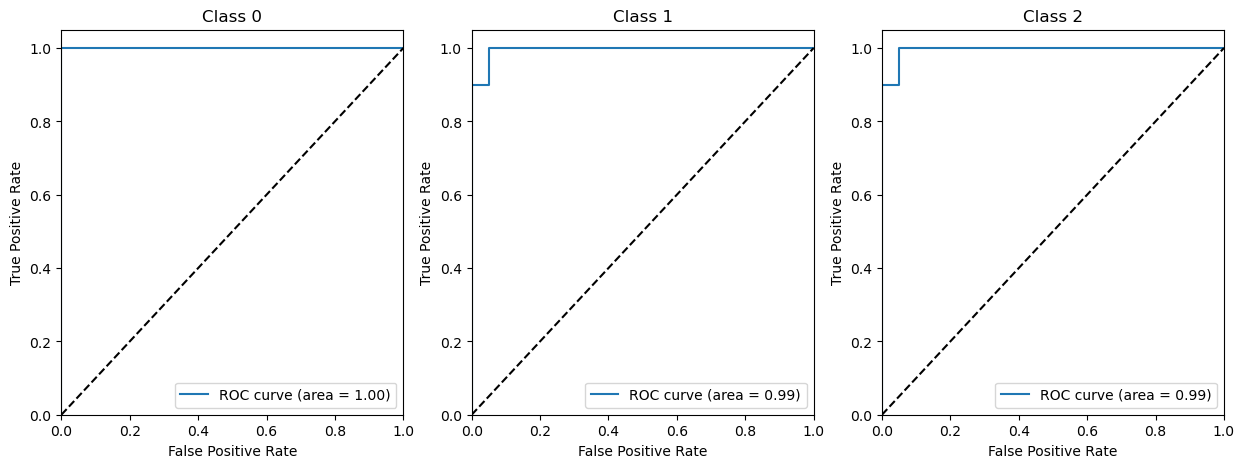

In [104]:
# Plot of a ROC curve for a specific class
plt.figure(figsize=(15, 5))
for idx, i in enumerate(range(n_classes)):
    plt.subplot(131+idx)
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Class %0.0f' % idx)
    plt.legend(loc="lower right")
plt.show()

# Pycaret library - unsupervised
- Pycaret이란, Python 기반의 오픈 소스 머신러닝라이브러리
- 머신 러닝 모델을 쉽게 구축하고 비교하며, 모델을 최적화하고 평가하는데 도움을 줌.
- 이를 활용해서, 데이터 과학자는 최소한의 코드 작성으로 다양한 머신러닝 모델을 탐색하고 최적화 가능.
- Pycaret을 활용해서 머신러닝을 통해 구현되는 a) 분류, b) 회귀, c) 클러스터링, d) 이상치 탐지 등 다양한 문제에 대한 모델을 쉽게 빠르게 구축할 수 있음   
출처: https://medium.com/@HeCanThink/clustering-with-pycaret-a-hands-on-example-92999de0f69a
https://pycaret.gitbook.io/docs

!pip install pycaret

In [1]:
from pycaret.datasets import get_data
data = get_data('pokemon')

from sklearn.model_selection import train_test_split
test_size=0.2
data_train, data_test = train_test_split(data, test_size=test_size)

ImportError: dlopen(/Users/jongmoonha/Library/CloudStorage/SynologyDrive-Main/00_수업/2025_1_AI-ME (Graduate)/2_강의자료_작성중/AI-ME-Practice/.venv/lib/python3.11/site-packages/pandas/_libs/pandas_parser.cpython-311-darwin.so, 0x0002): tried: '/Users/jongmoonha/Library/CloudStorage/SynologyDrive-Main/00_수업/2025_1_AI-ME (Graduate)/2_강의자료_작성중/AI-ME-Practice/.venv/lib/python3.11/site-packages/pandas/_libs/pandas_parser.cpython-311-darwin.so' (code signature in <1EE1BC6A-71B6-3FA2-BE63-61B7E4217D59> '/Users/jongmoonha/Library/CloudStorage/SynologyDrive-Main/00_수업/2025_1_AI-ME (Graduate)/2_강의자료_작성중/AI-ME-Practice/.venv/lib/python3.11/site-packages/pandas/_libs/pandas_parser.cpython-311-darwin.so' not valid for use in process: library load disallowed by system policy), '/System/Volumes/Preboot/Cryptexes/OS/Users/jongmoonha/Library/CloudStorage/SynologyDrive-Main/00_수업/2025_1_AI-ME (Graduate)/2_강의자료_작성중/AI-ME-Practice/.venv/lib/python3.11/site-packages/pandas/_libs/pandas_parser.cpython-311-darwin.so' (no such file), '/Users/jongmoonha/Library/CloudStorage/SynologyDrive-Main/00_수업/2025_1_AI-ME (Graduate)/2_강의자료_작성중/AI-ME-Practice/.venv/lib/python3.11/site-packages/pandas/_libs/pandas_parser.cpython-311-darwin.so' (code signature in <1EE1BC6A-71B6-3FA2-BE63-61B7E4217D59> '/Users/jongmoonha/Library/CloudStorage/SynologyDrive-Main/00_수업/2025_1_AI-ME (Graduate)/2_강의자료_작성중/AI-ME-Practice/.venv/lib/python3.11/site-packages/pandas/_libs/pandas_parser.cpython-311-darwin.so' not valid for use in process: library load disallowed by system policy), '/Users/jongmoonha/Library/CloudStorage/SynologyDrive-Main/00_수업/2025_1_AI-ME (Graduate)/2_강의자료_작성중/AI-ME-Practice/.venv/lib/python3.11/site-packages/pandas/_libs/pandas_parser.cpython-311-darwin.so' (code signature in <1EE1BC6A-71B6-3FA2-BE63-61B7E4217D59> '/Users/jongmoonha/Library/CloudStorage/SynologyDrive-Main/00_수업/2025_1_AI-ME (Graduate)/2_강의자료_작성중/AI-ME-Practice/.venv/lib/python3.11/site-packages/pandas/_libs/pandas_parser.cpython-311-darwin.so' not valid for use in process: library load disallowed by system policy), '/System/Volumes/Preboot/Cryptexes/OS/Users/jongmoonha/Library/CloudStorage/SynologyDrive-Main/00_수업/2025_1_AI-ME (Graduate)/2_강의자료_작성중/AI-ME-Practice/.venv/lib/python3.11/site-packages/pandas/_libs/pandas_parser.cpython-311-darwin.so' (no such file), '/Users/jongmoonha/Library/CloudStorage/SynologyDrive-Main/00_수업/2025_1_AI-ME (Graduate)/2_강의자료_작성중/AI-ME-Practice/.venv/lib/python3.11/site-packages/pandas/_libs/pandas_parser.cpython-311-darwin.so' (code signature in <1EE1BC6A-71B6-3FA2-BE63-61B7E4217D59> '/Users/jongmoonha/Library/CloudStorage/SynologyDrive-Main/00_수업/2025_1_AI-ME (Graduate)/2_강의자료_작성중/AI-ME-Practice/.venv/lib/python3.11/site-packages/pandas/_libs/pandas_parser.cpython-311-darwin.so' not valid for use in process: library load disallowed by system policy)

In [76]:
from pycaret.clustering import *
clu1 = setup(data_train, session_id=123,experiment_name='poketmon', ignore_features=['Name'])
# One hot encoding for categorical features -> transformed data shape

,Description,Value
0,Session id,123
1,Original data shape,"(640, 13)"
2,Transformed data shape,"(640, 46)"
3,Ignore features,1
4,Numeric features,9
5,Categorical features,2
6,Rows with missing values,48.8%
7,Preprocess,True
8,Imputation type,simple
9,Numeric imputation,mean


In [68]:
# to check all the available models
models()

,Name,Reference
ID,,
kmeans,K-Means Clustering,sklearn.cluster._kmeans.KMeans
ap,Affinity Propagation,sklearn.cluster._affinity_propagation.Affinity...
meanshift,Mean Shift Clustering,sklearn.cluster._mean_shift.MeanShift
sc,Spectral Clustering,sklearn.cluster._spectral.SpectralClustering
hclust,Agglomerative Clustering,sklearn.cluster._agglomerative.AgglomerativeCl...
dbscan,Density-Based Spatial Clustering,sklearn.cluster._dbscan.DBSCAN
optics,OPTICS Clustering,sklearn.cluster._optics.OPTICS
birch,Birch Clustering,sklearn.cluster._birch.Birch


In [77]:
kmeans = create_model('kmeans', num_clusters = 5)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2884,431.9236,1.1464,0,0,0


In [80]:
kmeans_results = assign_model(kmeans)
kmeans_results.insert(0, 'Name', data_train['Name'])
kmeans_results.head(10)

,Name,#,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Cluster
170,Quilava,156,Fire,NaN,405,58,64,58,80,65,80,2,False,Cluster 2
276,Torchic,255,Fire,NaN,310,45,60,40,70,50,45,3,False,Cluster 1
211,Espeon,196,Psychic,NaN,525,65,65,60,130,95,110,2,False,Cluster 2
469,Shellos,422,Water,NaN,325,76,48,48,57,62,34,4,False,Cluster 1
727,Bunnelby,659,Normal,NaN,237,38,36,38,32,36,57,6,False,Cluster 0
59,Psyduck,54,Water,NaN,320,50,52,48,65,50,55,1,False,Cluster 2
99,Gastly,92,Ghost,Poison,310,30,35,30,100,35,80,1,False,Cluster 2
186,Pichu,172,Electric,NaN,205,20,40,15,35,35,60,2,False,Cluster 1
337,Electrike,309,Electric,NaN,295,40,45,40,65,40,65,3,False,Cluster 1
366,AltariaMega Altaria,334,Dragon,Fairy,590,75,110,110,110,105,80,3,False,Cluster 4


In [71]:
plot_model(kmeans)

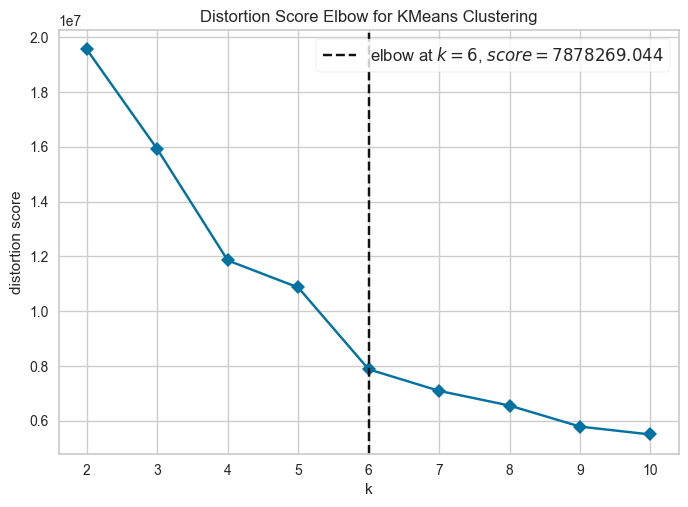

In [72]:
plot_model(kmeans, plot = 'elbow')

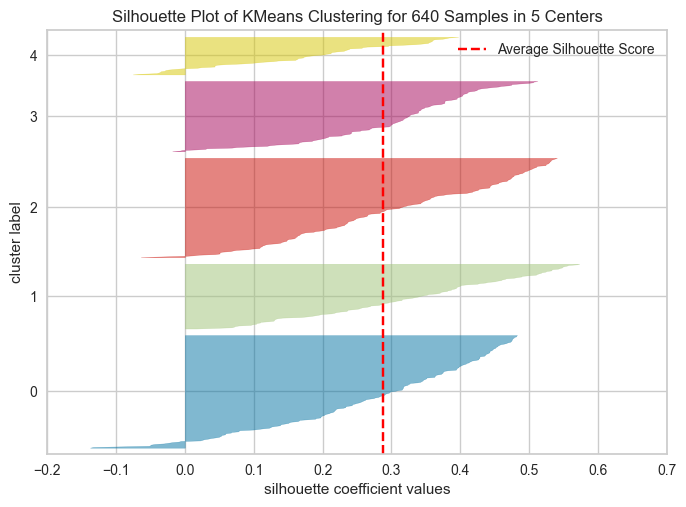

In [73]:
plot_model(kmeans, plot='silhouette')
# 각 군집별 샘플의 실루엣 계수를 오름차순으로 이어서 plot
# 실루엣 스코어높을수록
# 개별 군집의 실루엣 계수의 평균값의 편차가 작을수록

In [85]:
# 예측 수행
pred_new = predict_model(kmeans, data=data_test)
pred_new.insert(1, 'Name', data_test['Name'])

In [86]:
pred_new

,#,Name,Type 1_Fire,Type 1_Psychic,Type 1_Water,Type 1_Normal,Type 1_Ghost,Type 1_Electric,Type 1_Dragon,Type 1_Grass,...,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Cluster
238,220.0,Swinub,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,250.0,50.0,50.0,40.0,30.0,30.0,50.0,2.0,False,Cluster 1
53,48.0,Venonat,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,305.0,60.0,55.0,50.0,40.0,55.0,45.0,1.0,False,Cluster 2
354,323.0,CameruptMega Camerupt,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,560.0,70.0,120.0,100.0,145.0,105.0,20.0,3.0,False,Cluster 4
166,152.0,Chikorita,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,318.0,45.0,49.0,65.0,49.0,65.0,45.0,2.0,False,Cluster 2
627,566.0,Archen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,401.0,55.0,112.0,45.0,74.0,45.0,70.0,5.0,False,Cluster 0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,248.0,Tyranitar,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,600.0,100.0,134.0,110.0,95.0,100.0,61.0,2.0,False,Cluster 4
113,105.0,Marowak,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,425.0,60.0,80.0,110.0,50.0,80.0,45.0,1.0,False,Cluster 2
462,415.0,Combee,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,244.0,30.0,30.0,42.0,30.0,42.0,70.0,4.0,False,Cluster 1
307,283.0,Surskit,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,269.0,40.0,30.0,32.0,50.0,52.0,65.0,3.0,False,Cluster 1
